In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1


In [2]:
import pandas as pd
import os


# List all files in the directory
files = os.listdir(path)
print("Files in dataset directory:", files)

# Assuming the dataset contains a CSV file
csv_file = [file for file in files if file.endswith('.csv')][0]  # Get the first CSV file
csv_path = os.path.join(path, csv_file)

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
df.head()


Files in dataset directory: ['credit_risk_dataset.csv']


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
import numpy as np

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.drop(columns=['person_age','loan_grade','person_home_ownership','loan_int_rate','cb_person_cred_hist_length','cb_person_default_on_file','loan_percent_income','loan_int_rate'], inplace=True)

In [6]:
df.head()

,person_income,person_emp_length,loan_intent,loan_amnt,loan_status
0,59000,123.0,PERSONAL,35000,1
1,9600,5.0,EDUCATION,1000,0
2,9600,1.0,MEDICAL,5500,1
3,65500,4.0,MEDICAL,35000,1
4,54400,8.0,MEDICAL,35000,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   person_income      32581 non-null  int64  
 1   person_emp_length  31686 non-null  float64
 2   loan_intent        32581 non-null  object 
 3   loan_amnt          32581 non-null  int64  
 4   loan_status        32581 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ MB


In [8]:
df.describe()

,person_income,person_emp_length,loan_amnt,loan_status
count,3.258100e+04,31686.000000,32581.000000,32581.000000
mean,6.607485e+04,4.789686,9589.371106,0.218164
std,6.198312e+04,4.142630,6322.086646,0.413006
min,4.000000e+03,0.000000,500.000000,0.000000
25%,3.850000e+04,2.000000,5000.000000,0.000000
50%,5.500000e+04,4.000000,8000.000000,0.000000
75%,7.920000e+04,7.000000,12200.000000,0.000000
max,6.000000e+06,123.000000,35000.000000,1.000000


array([[<Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

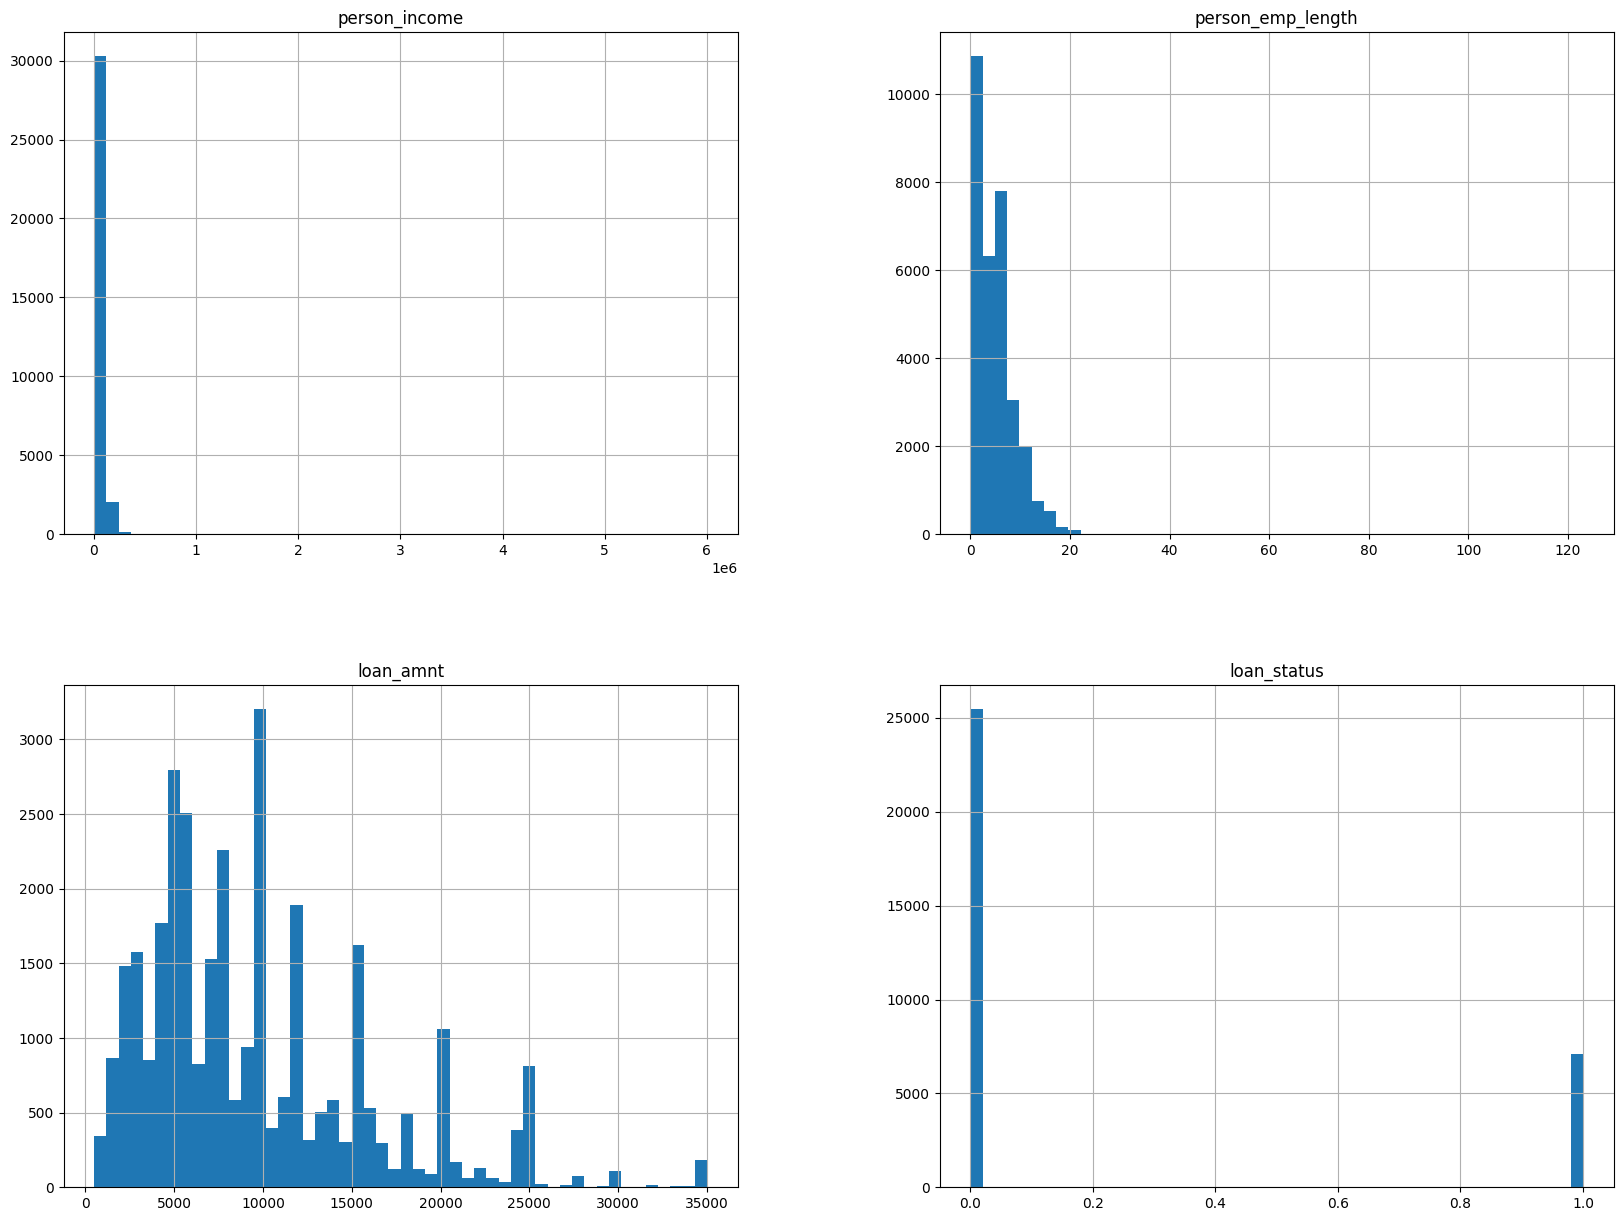

In [9]:
df.hist(bins=50, figsize=(20,15))

In [10]:
len(df[:5000])

5000

In [11]:
df=df[:5000]

In [12]:
df.describe()

,person_income,person_emp_length,loan_amnt,loan_status
count,5000.000000,4791.000000,5000.000000,5000.000000
mean,49509.141400,3.708829,8478.630000,0.306600
std,36813.181007,3.720418,7182.711611,0.461128
min,9600.000000,0.000000,500.000000,0.000000
25%,30000.000000,1.000000,3200.000000,0.000000
50%,39000.000000,3.000000,5000.000000,0.000000
75%,55014.000000,6.000000,12000.000000,1.000000
max,500000.000000,123.000000,35000.000000,1.000000


array([[<Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

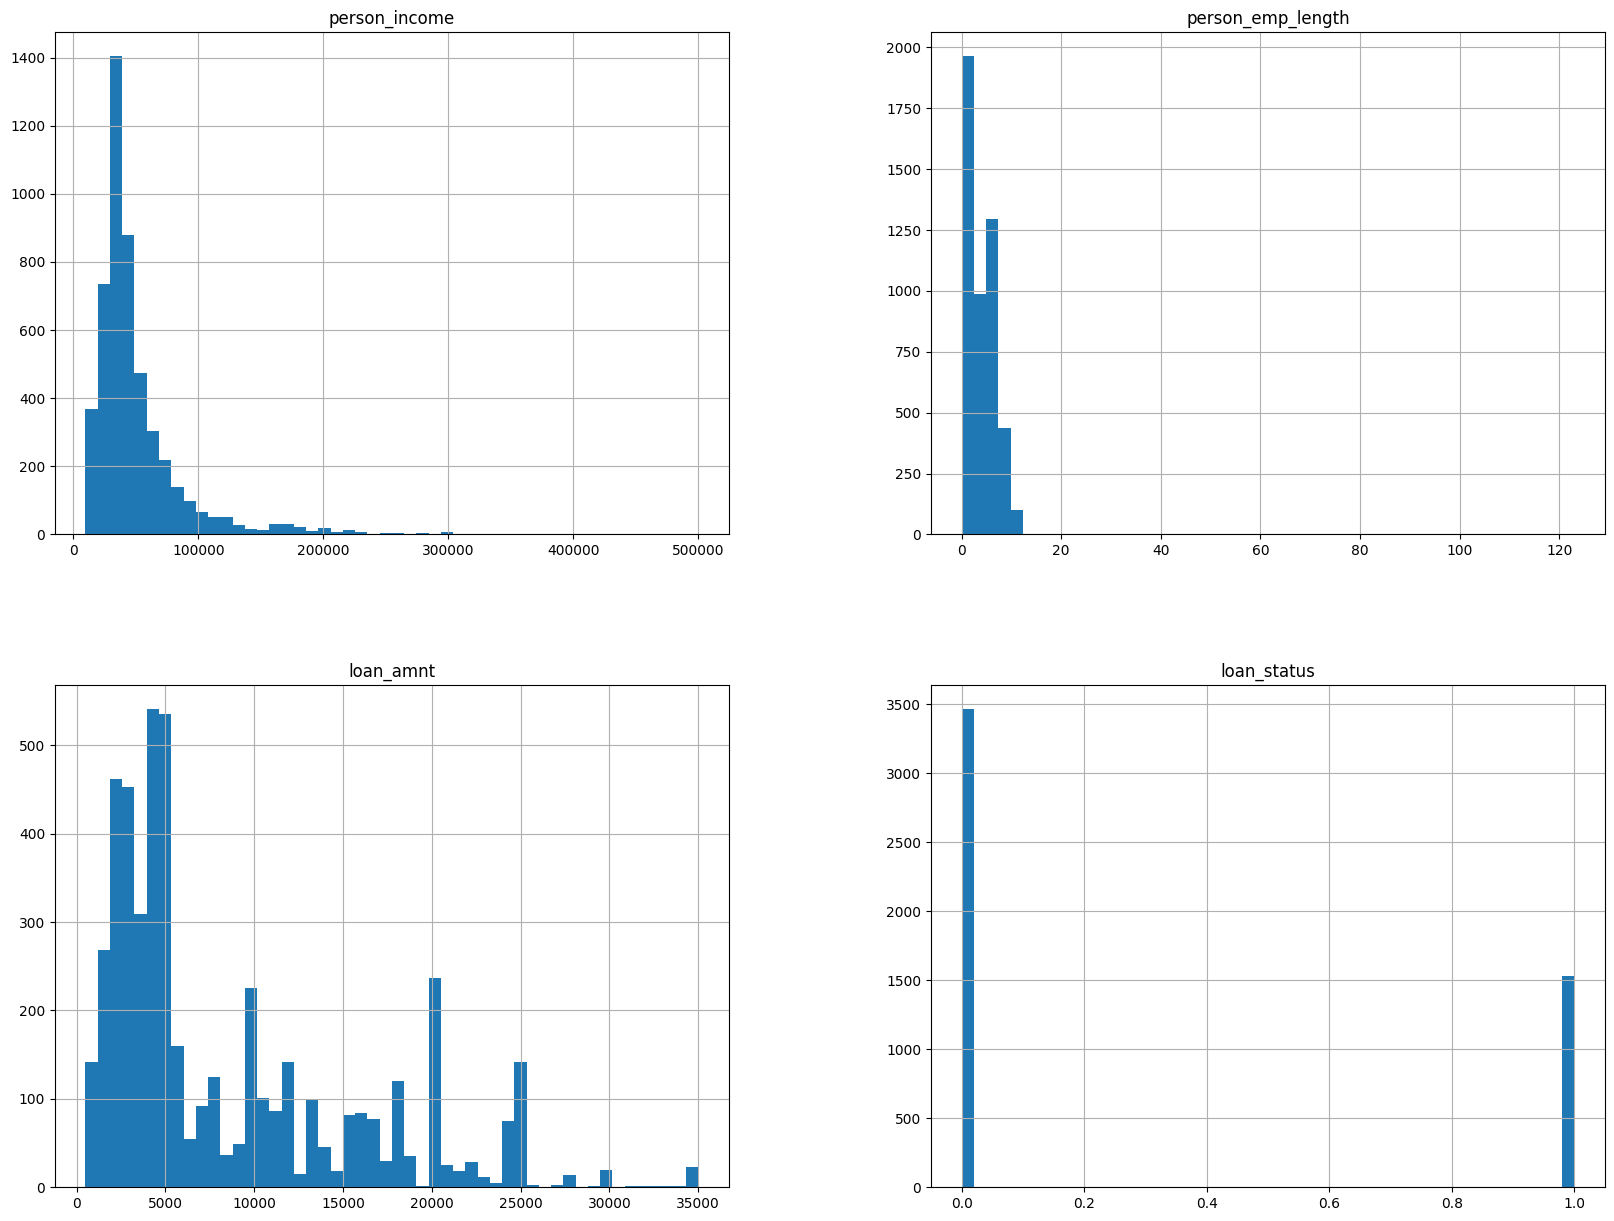

In [13]:
df.hist(bins=50, figsize=(20,15))

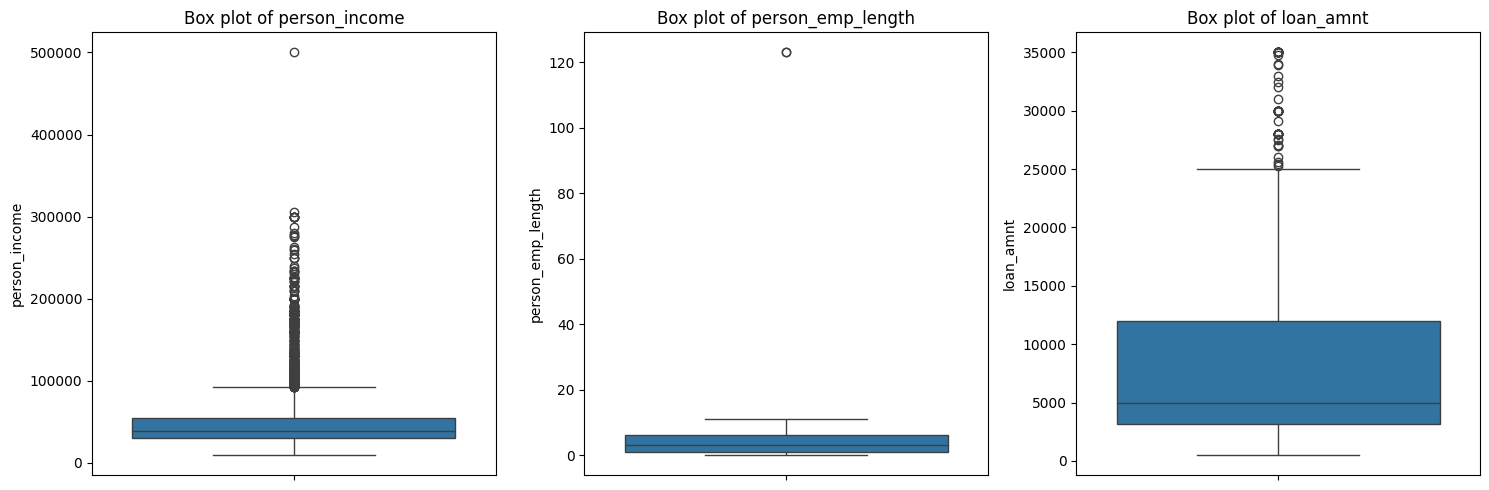

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot box plots to check for outliers
def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(data=df, y=column)
        plt.title(f"Box plot of {column}")
    plt.tight_layout()
    plt.show()

# Plot box plots for the cleaned dataset
columns_to_check = ['person_income',	'person_emp_length',	'loan_amnt']
plot_boxplots(df, columns_to_check)


In [15]:
import pandas as pd

def remove_outliers(df, columns):
    # Remove outliers based on the IQR method for specified columns
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define acceptable range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal
columns_to_check = ['person_income',	'person_emp_length',	'loan_amnt']
df_cleaned = remove_outliers(df, columns_to_check)

# Display the new shape of the cleaned dataset
print("Original dataset size:", df.shape)
print("Cleaned dataset size:", df_cleaned.shape)


Original dataset size: (5000, 5)
Cleaned dataset size: (4176, 5)


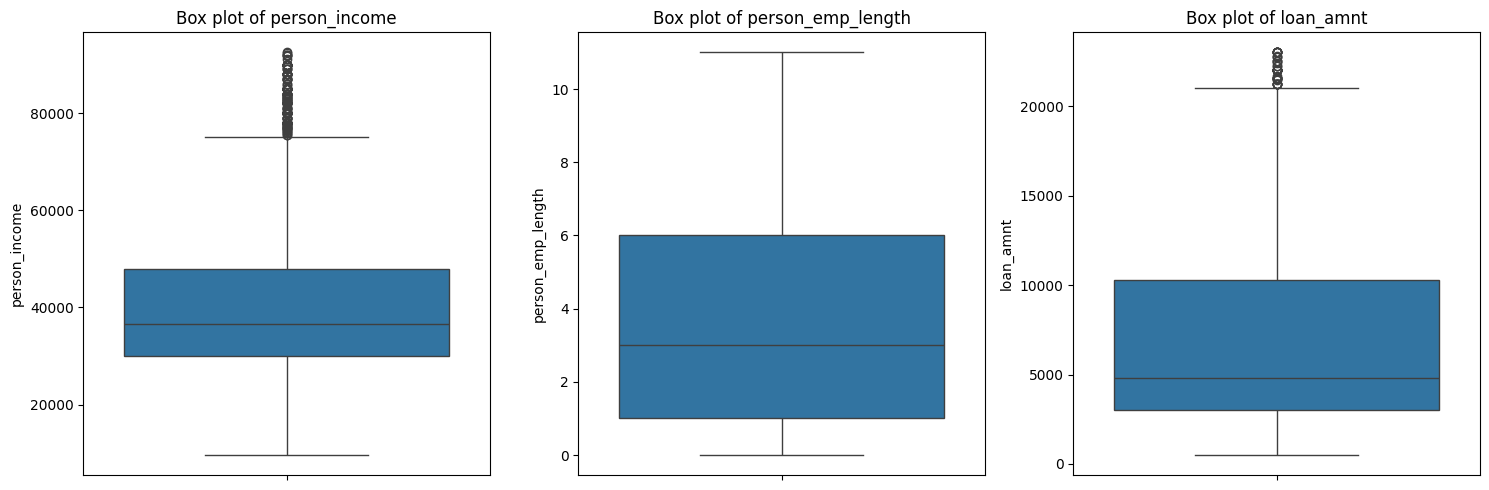

In [16]:
plot_boxplots(df_cleaned, columns_to_check)


array([[<Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

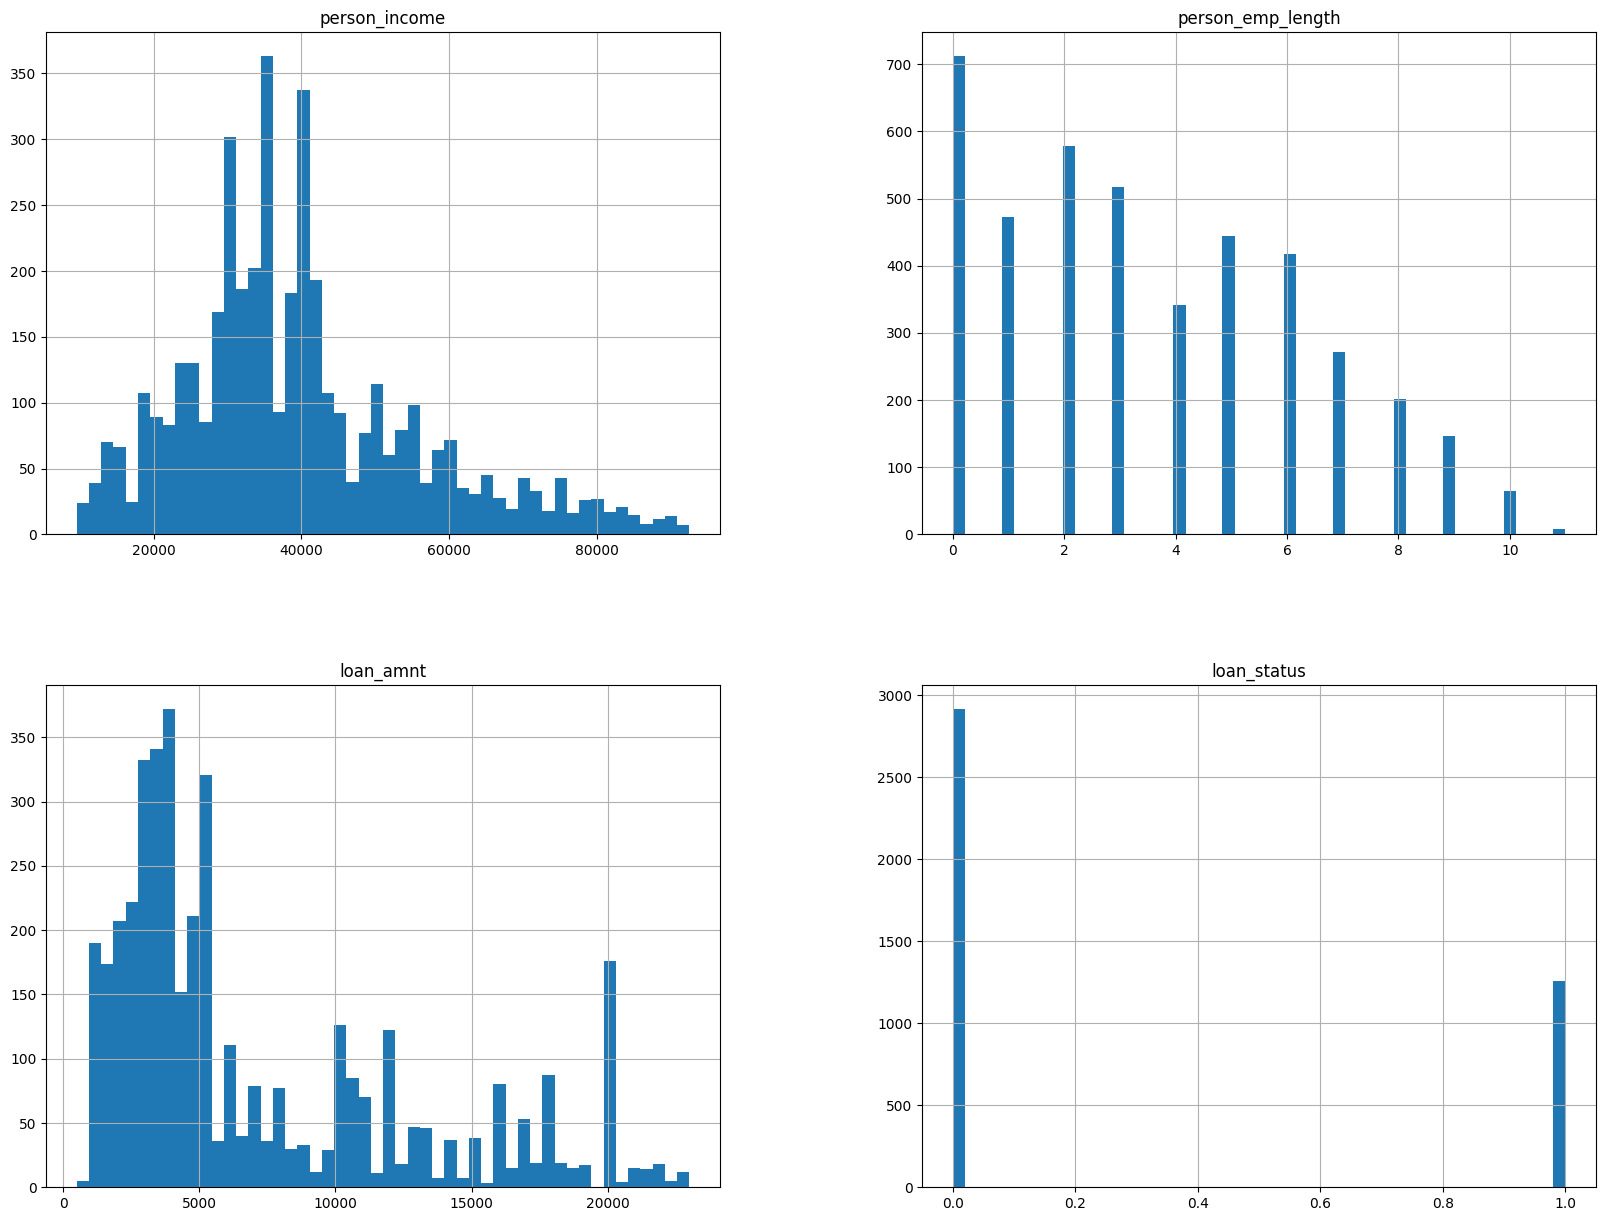

In [17]:
df_cleaned.hist(bins=50, figsize=(20,15))

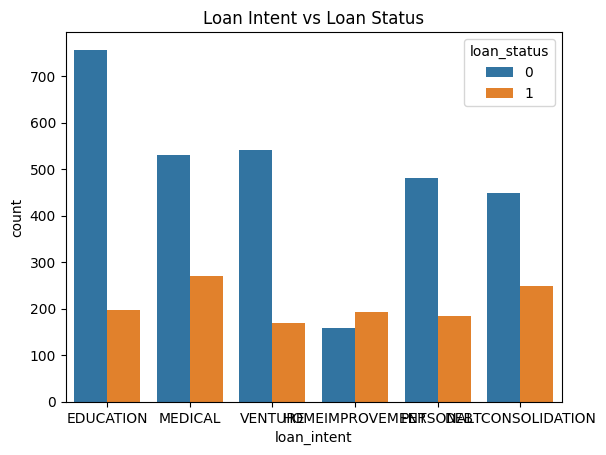

In [18]:
sns.countplot(data=df_cleaned, x='loan_intent', hue='loan_status',)
plt.title("Loan Intent vs Loan Status")
plt.show()


In [19]:
def show_heatmap(data):
    plt.figure(figsize=(15,10))
    corr=data.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr,dtype=bool))
    sns.heatmap(data=corr,annot=True,cmap='coolwarm',mask=mask)

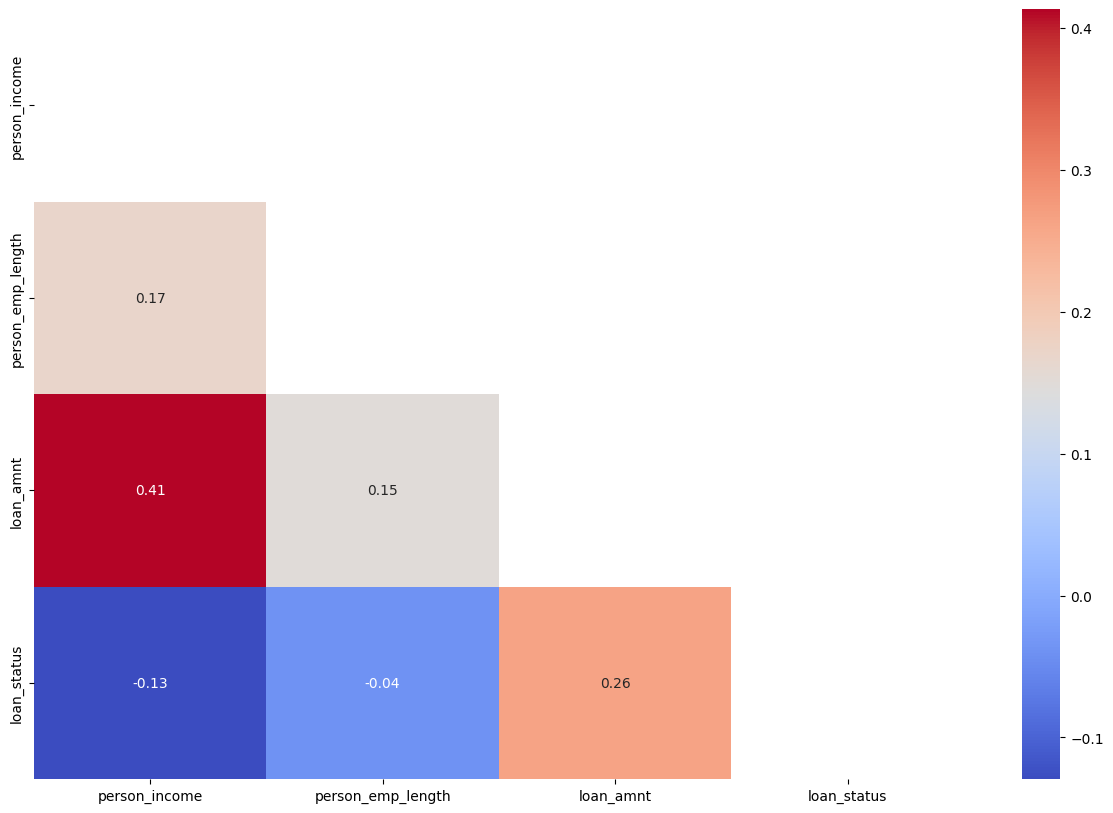

In [20]:
show_heatmap(df_cleaned)

In [21]:
data = pd.get_dummies(df_cleaned, columns=['loan_intent'], drop_first=True)


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:

scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
log_reg = LogisticRegression()


In [27]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.01, 'solver': 'newton-cg'}


In [28]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


In [29]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7547846889952153
Confusion Matrix:
 [[556  28]
 [177  75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84       584
           1       0.73      0.30      0.42       252

    accuracy                           0.75       836
   macro avg       0.74      0.62      0.63       836
weighted avg       0.75      0.75      0.72       836



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='saga', max_iter=1000, class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

y_pred= pipeline.predict(X_test)

print('test acuracy ',pipeline.score(X_test,y_test))
print('test acuracy ',pipeline.score(X_train,y_train))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

test acuracy  0.7284688995215312
test acuracy  0.7122754491017964
[[431 153]
 [ 74 178]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       584
           1       0.54      0.71      0.61       252

    accuracy                           0.73       836
   macro avg       0.70      0.72      0.70       836
weighted avg       0.76      0.73      0.74       836



In [31]:
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Step 2: Apply the new threshold (e.g., 0.3)
threshold = 0.55
y_pred_new_threshold = np.where(y_prob >= threshold, 1, 0)

# Step 3: Evaluate the model
print(confusion_matrix(y_test, y_pred_new_threshold))
print(classification_report(y_test, y_pred_new_threshold))

[[473 111]
 [ 93 159]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       584
           1       0.59      0.63      0.61       252

    accuracy                           0.76       836
   macro avg       0.71      0.72      0.72       836
weighted avg       0.76      0.76      0.76       836



In [32]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define the pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('random_forest', RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=7))  # Fix the key and value pair here
])

# Step 2: Fit the model
pipeline.fit(X_train, y_train)

# Step 3: Predict and evaluate
y_pred = pipeline.predict(X_test)

# Step 4: Print the evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[533  51]
 [103 149]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       584
           1       0.74      0.59      0.66       252

    accuracy                           0.82       836
   macro avg       0.79      0.75      0.77       836
weighted avg       0.81      0.82      0.81       836

